In [4]:
import pandas as pd
import scipy.stats as stats
from numpy import std, mean, sqrt
import matplotlib.pyplot as plt
import scipy.stats as stats
from cliffs_delta import cliffs_delta

In [5]:
df_bl_120=pd.read_csv('/Users/marlenebultemann/Desktop/IUG/Delfi/#Messungen/Baseline_Tesla_WinAutomate_120s+60s_cooldown_new/df_bl_120.csv')
df_bl_600=pd.read_csv('/Users/marlenebultemann/Desktop/IUG/Delfi/#Messungen/Baseline_Tesla_600+60/df_bl_600.csv')
df_dt=pd.read_csv('/Users/marlenebultemann/Desktop/IUG/Delfi/#Messungen/1/df_dt.csv')
df_lr=pd.read_csv('/Users/marlenebultemann/Desktop/IUG/Delfi/#Messungen/2/df_lr.csv')
df_svm=pd.read_csv('/Users/marlenebultemann/Desktop/IUG/Delfi/#Messungen/4_SVM/df_svm.csv')
df_nn=pd.read_csv('/Users/marlenebultemann/Desktop/IUG/Delfi/#Messungen/3_NN/df_nn.csv')

In [6]:
cpu_bl120 = df_bl_120['CPU']
ram_bl120 = df_bl_120['RAM']
el_power_bl120 = df_bl_120['Wert 1-avg[W]']

#600+ 60
cpu_bl_600= df_bl_600['CPU']
ram_bl_600= df_bl_600['RAM']
el_power_bl_600= df_bl_600['Wert 1-avg[W]']

#dt
cpu_dt = df_dt['CPU']
ram_dt = df_dt['RAM']
el_power_dt = df_dt['Wert 1-avg[W]']

#lr
cpu_lr = df_lr['CPU']
ram_lr = df_lr['RAM']
el_power_lr = df_lr['Wert 1-avg[W]']

#svm
cpu_svm = df_svm['CPU']
ram_svm = df_svm['RAM']
el_power_svm = df_svm['Wert 1-avg[W]']

#nn
cpu_nn = df_nn['CPU']
ram_nn = df_nn['RAM']
el_power_nn = df_nn['Wert 1-avg[W]']

In [7]:
# Data for each boxplot
cpu_data = [cpu_bl120, cpu_bl_600, cpu_dt, cpu_lr, cpu_svm, cpu_nn]
ram_data = [ram_bl120, ram_bl_600, ram_dt, ram_lr, ram_svm, ram_nn]
power_data = [el_power_bl120.dropna(), el_power_bl_600.dropna(), el_power_dt.dropna(), el_power_lr.dropna(), el_power_svm.dropna(), el_power_nn.dropna()]

# Boxplot labels
labels = ['BL\n 120', 'BL\n 600', 'DT', 'LR', 'SVM', 'MLP']

# Create three boxplots for CPU, RAM, and Power
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

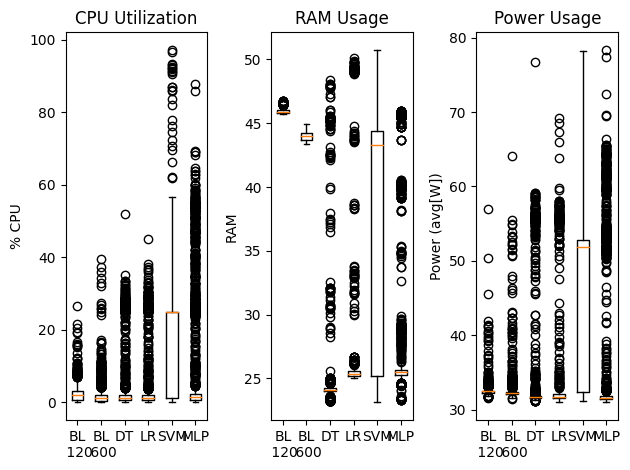

In [8]:
# Boxplot for CPU
plt.subplot(1, 3, 1)
plt.boxplot(cpu_data, labels=labels)
plt.title('CPU Utilization')
plt.ylabel('% CPU')

# Boxplot for RAM
plt.subplot(1, 3, 2)
plt.boxplot(ram_data, labels=labels)
plt.title('RAM Usage')
plt.ylabel('RAM')

# Boxplot for Power
plt.subplot(1, 3, 3)
plt.boxplot(power_data, labels=labels)
plt.title('Power Usage')
plt.ylabel('Power (avg[W])')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Text(0, 0.5, '% CPU')

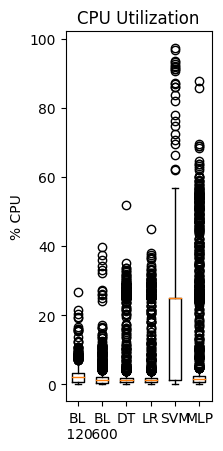

In [9]:
# Boxplot for CPU
plt.subplot(1, 3, 1)
plt.boxplot(cpu_data, labels=labels)
plt.title('CPU Utilization')
plt.ylabel('% CPU')


Text(0, 0.5, 'RAM')

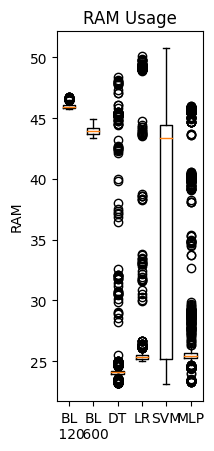

In [10]:
# Boxplot for RAM
plt.subplot(1, 3, 2)
plt.boxplot(ram_data, labels=labels)
plt.title('RAM Usage')
plt.ylabel('RAM')

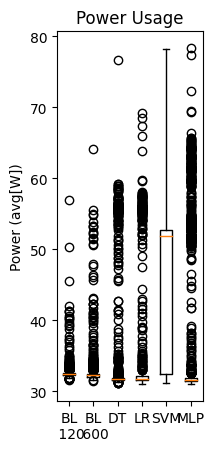

In [11]:
# Boxplot for Power
plt.subplot(1, 3, 3)
plt.boxplot(power_data, labels=labels)
plt.title('Power Usage')
plt.ylabel('Power (avg[W])')
plt.show()

In [12]:
groups_cpu = [cpu_dt,cpu_lr, cpu_nn]
for i in groups_cpu:
    print(stats.mannwhitneyu(cpu_bl120, i))
    print(cliffs_delta(cpu_bl120, i))

MannwhitneyuResult(statistic=7992894.0, pvalue=1.990693360453466e-55)
(0.21249945294205677, 'small')
MannwhitneyuResult(statistic=7905708.0, pvalue=5.8667968541002934e-49)
(0.1992735828999661, 'small')
MannwhitneyuResult(statistic=7100884.0, pvalue=1.2262098829325871e-08)
(0.07718405441195689, 'negligible')


In [13]:
groups_cpu = [cpu_lr, cpu_nn]
for i in groups_cpu:
    print(stats.mannwhitneyu(cpu_dt, i))
    print(cliffs_delta(cpu_dt, i))

MannwhitneyuResult(statistic=6382140.0, pvalue=0.01876382483652754)
(-0.031847381111319864, 'negligible')
MannwhitneyuResult(statistic=5616948.0, pvalue=9.647766047840272e-28)
(-0.1479248470949346, 'small')


In [14]:
print(stats.mannwhitneyu(cpu_lr, cpu_nn))
print(cliffs_delta(cpu_lr, cpu_nn))

MannwhitneyuResult(statistic=5763545.0, pvalue=1.774798532226238e-20)
(-0.12568649609178772, 'negligible')


In [15]:
#bl600 & svm
print(stats.mannwhitneyu(cpu_bl_600, cpu_svm))
print(cliffs_delta(cpu_bl_600, cpu_svm))

MannwhitneyuResult(statistic=74970475.5, pvalue=0.0)
(-0.5388092010370384, 'large')


In [16]:
groups_ram = [ram_dt,ram_lr, ram_nn]
for i in groups_ram:
    print(stats.mannwhitneyu(ram_bl120, i))
    print(cliffs_delta(ram_bl120, i))

MannwhitneyuResult(statistic=13126258.0, pvalue=0.0)
(0.9912162783813092, 'large')
MannwhitneyuResult(statistic=12959039.0, pvalue=0.0)
(0.9658496282015974, 'large')
MannwhitneyuResult(statistic=13112411.0, pvalue=0.0)
(0.9891157275764457, 'large')


In [17]:
groups_ram = [ram_lr, ram_nn]
for i in groups_ram:
    print(stats.mannwhitneyu(ram_dt, i))
    print(cliffs_delta(ram_dt, i))

MannwhitneyuResult(statistic=383069.0, pvalue=0.0)
(-0.9418895142436443, 'large')


MannwhitneyuResult(statistic=614692.0, pvalue=0.0)
(-0.9067529590999381, 'large')


In [18]:
print(stats.mannwhitneyu(ram_lr, ram_nn))
print(cliffs_delta(ram_lr, ram_nn))

MannwhitneyuResult(statistic=5828415.0, pvalue=1.2428553230788492e-17)
(-0.11584590024348156, 'negligible')


In [19]:
print(stats.mannwhitneyu(ram_bl_600, ram_svm))
print(cliffs_delta(ram_bl_600, ram_svm))

MannwhitneyuResult(statistic=221953134.5, pvalue=0.0)
(0.36537407225579965, 'medium')


In [20]:
groups_power = [el_power_dt.fillna(0),el_power_lr.fillna(0), el_power_nn.fillna(0)]
for i in groups_power:
    print(stats.mannwhitneyu(el_power_bl120.fillna(0), i))
    print(cliffs_delta(el_power_bl120.fillna(0), i))

MannwhitneyuResult(statistic=11726217.0, pvalue=0.0)
(0.7788340115082029, 'large')
MannwhitneyuResult(statistic=11279080.0, pvalue=0.0)
(0.7110045910392022, 'large')
MannwhitneyuResult(statistic=10889674.5, pvalue=0.0)
(0.6519328761230996, 'large')


In [21]:
groups_power = [el_power_lr.fillna(0), el_power_nn.fillna(0)]
for i in groups_power:
    print(stats.mannwhitneyu(el_power_dt.fillna(0).fillna(0), i))
    print(cliffs_delta(el_power_dt.fillna(0), i))

MannwhitneyuResult(statistic=6457768.0, pvalue=0.13266393957521103)
(-0.020374827036775414, 'negligible')
MannwhitneyuResult(statistic=8039359.0, pvalue=4.60664617383631e-59)
(0.21954806225439752, 'small')


In [22]:
print(stats.mannwhitneyu(el_power_lr.fillna(0).fillna(0), el_power_nn.fillna(0)))
print(cliffs_delta(el_power_lr.fillna(0), i))

MannwhitneyuResult(statistic=7706568.0, pvalue=9.835353319587461e-36)
(0.16906460714489152, 'small')


In [23]:
print(stats.mannwhitneyu(el_power_bl_600.fillna(0).fillna(0), el_power_svm.fillna(0)))
print(cliffs_delta(el_power_bl_600.fillna(0), el_power_svm.fillna(0)))

MannwhitneyuResult(statistic=71954854.5, pvalue=0.0)
(-0.557360192598503, 'large')
